## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the Dataset

In [2]:
train = pd.read_csv('D:\Practise\Titanic Dataset.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


## Information about Data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

# Exploratory Data Analysis

Let's start with Missing values

In [8]:
train.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

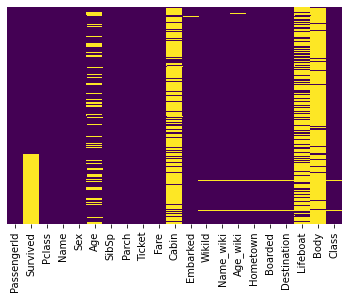

In [9]:
sns.heatmap(train.isnull(),yticklabels = False,cbar= False, cmap = 'viridis')

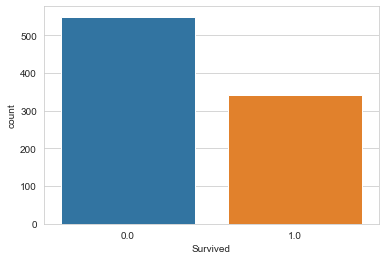

In [10]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data=train)

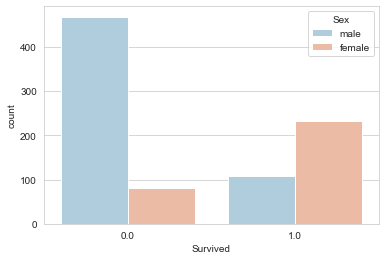

In [11]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train, palette = 'RdBu_r')

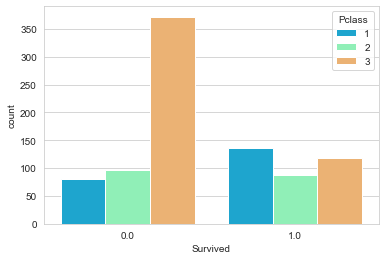

In [12]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = 'rainbow')

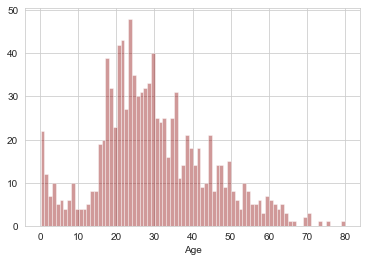

In [13]:
sns.distplot(train['Age'].dropna(),kde=False,color = 'darkred', bins = 80)

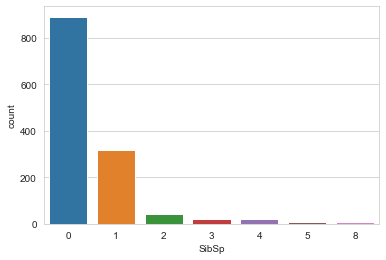

In [15]:
sns.countplot(x = 'SibSp', data = train)

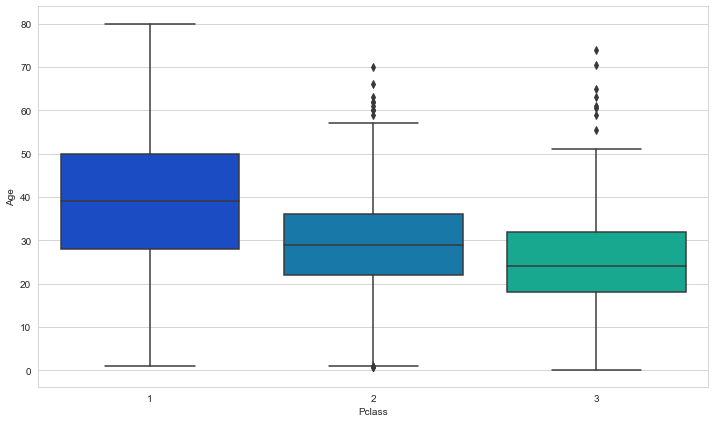

In [16]:
plt.figure(figsize=(12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'winter')

In [17]:
def impute_age(cols):
    age = cols[0]
    Pclass = cols[1]
    if pd.isnull(age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 27
        else:
            return 24
    else:
        return age


In [19]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

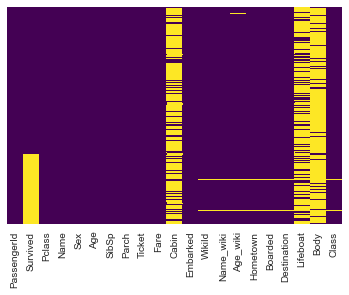

In [20]:
sns.heatmap(train.isnull(),yticklabels = False,cbar= False, cmap = 'viridis')

## Converting Categorical Features

In [24]:
embark = pd.get_dummies(train['Embarked'],drop_first = True)
sex = pd.get_dummies(train['Sex'], drop_first = True)

In [22]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
1304,0,1
1305,0,0
1306,0,1
1307,0,1


In [25]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
1304,1
1305,0
1306,1
1307,1


In [30]:
concat_sex_embark = pd.concat([sex, embark], axis = 1)

In [31]:
concat_sex_embark

,male,Q,S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
1304,1,0,1
1305,0,0,0
1306,1,0,1
1307,1,0,1
